<center><img src='https://raw.githubusercontent.com/Jangrae/img/master/ml_python.png' width=600/></center>

# 실습 내용

- Grid Search로 다양한 알고리즘 모델을 튜닝합니다.


# 1.환경 준비

- 기본 라이브러리와 대상 데이터를 가져와 이후 과정을 준비합니다.

In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format='retina'

In [2]:
# 데이터 읽어오기
path = 'https://raw.githubusercontent.com/jangrae/csv/master/diabetes.csv'
data = pd.read_csv(path)

# 2.데이터 이해

- 분석할 데이터를 충분히 이해할 수 있도록 다양한 탐색 과정을 수행합니다.

In [3]:
# 상위 몇 개 행 확인
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# 변수 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# 기초통계량 확인
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# NaN 값 확인
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# 3.데이터 준비

- 전처리 과정을 통해 머신러닝 알고리즘에 사용할 수 있는 형태의 데이터를 준비합니다.

**1) x, y 분리**

In [7]:
# target 확인
target = 'Outcome'

# 데이터 분리
x = data.drop(target, axis = 1)
y = data[target] 

**2) 정규화**

In [8]:
# 정규화
x = (x - x.min()) / (x.max() - x.min())

**3) 학습용, 평가용 데이터 분리**

In [9]:
# 모듈 불러오기
from sklearn.model_selection import train_test_split

# 7:3으로 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=2022)

# 4.모델링

- GridSearchCV를 사용해 최선의 하이퍼파라미터를 갖는 모델을 만듭니다.
- 우선 사용할 모듈을 모두 불러옵니다.
- 평가 지표는 Classification Report를 사용합니다.

In [22]:
# 모듈 불러오기(알고리즘, GridSearchCV, 평가지표)
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report


## 4.1.KNN

- 파라미터 
    - n_neighbors: range(1, 11)
- GridSearchCV 선언
    - cv = 5
    - scoring = 'accuracy'

In [23]:
# 선언하기
model_knn = KNeighborsClassifier()

# 파라미터 선언
param = {'n_neighbors': range(1, 11)}

# Grid Search 모델 선언하기
model = GridSearchCV(model_knn,
                    param,
                    cv = 5,
                    scoring='accuracy')




In [24]:
# 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 11)}, scoring='accuracy')

In [25]:
# 최적파라미터, 성능 확인
print(model.best_params_)
print(model.best_score_)



{'n_neighbors': 9}
0.7485462097611629


In [26]:
# 예측하기
y_pred = model.predict(x_test)

In [45]:
# 평가하기
result = {}

result['KNN'] = classification_report(y_test, y_pred)

## 4.2.Decision Tree

- random_state = 2022
- 파라미터
    - max_depth: range(1, 11)
- GridSearchCV 선언
    - cv = 5
    - scoring = 'accuracy'

In [53]:
# 선언하기
model_dt = DecisionTreeClassifier(random_state=2022)

# 파라미터 선언
param = {'max_depth': range(1, 11)}

# Grid Search 모델 선언하기
model = GridSearchCV(model_dt,
                    param,
                    cv = 5,
                    scoring='accuracy')




In [54]:
# 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=2022),
             param_grid={'max_depth': range(1, 11)}, scoring='accuracy')

In [55]:
# 최적파라미터, 성능 확인

print(model.best_params_)
print(model.best_score_)

{'max_depth': 4}
0.7299065420560747


In [56]:
# 예측하기
y_pred = model.predict(x_test)

In [57]:
# 평가하기
print(classification_report(y_test, y_pred))
result['Decision Tree'] = classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.78      0.93      0.84       161
           1       0.69      0.39      0.50        70

    accuracy                           0.76       231
   macro avg       0.73      0.66      0.67       231
weighted avg       0.75      0.76      0.74       231



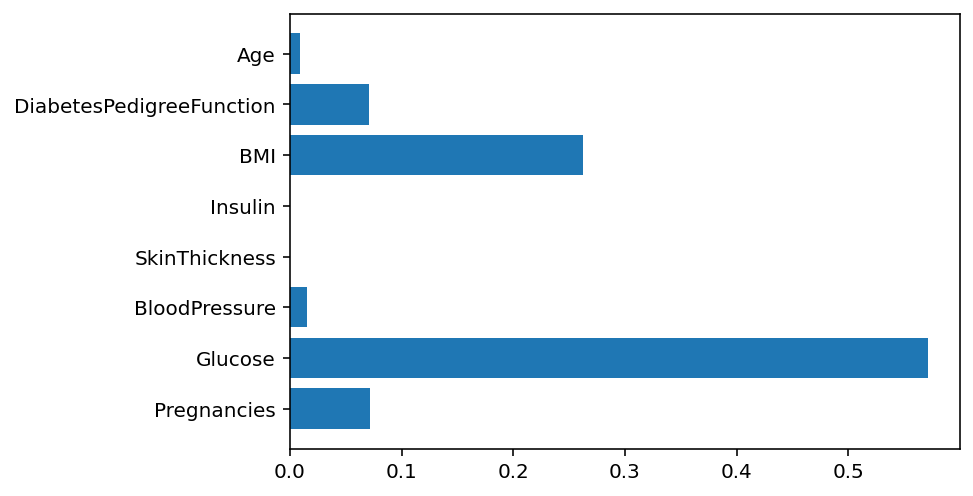

In [60]:
# 변수 중요도 시각화
plt.barh(y = list(x), width = model.best_estimator_.feature_importances_)
plt.show()

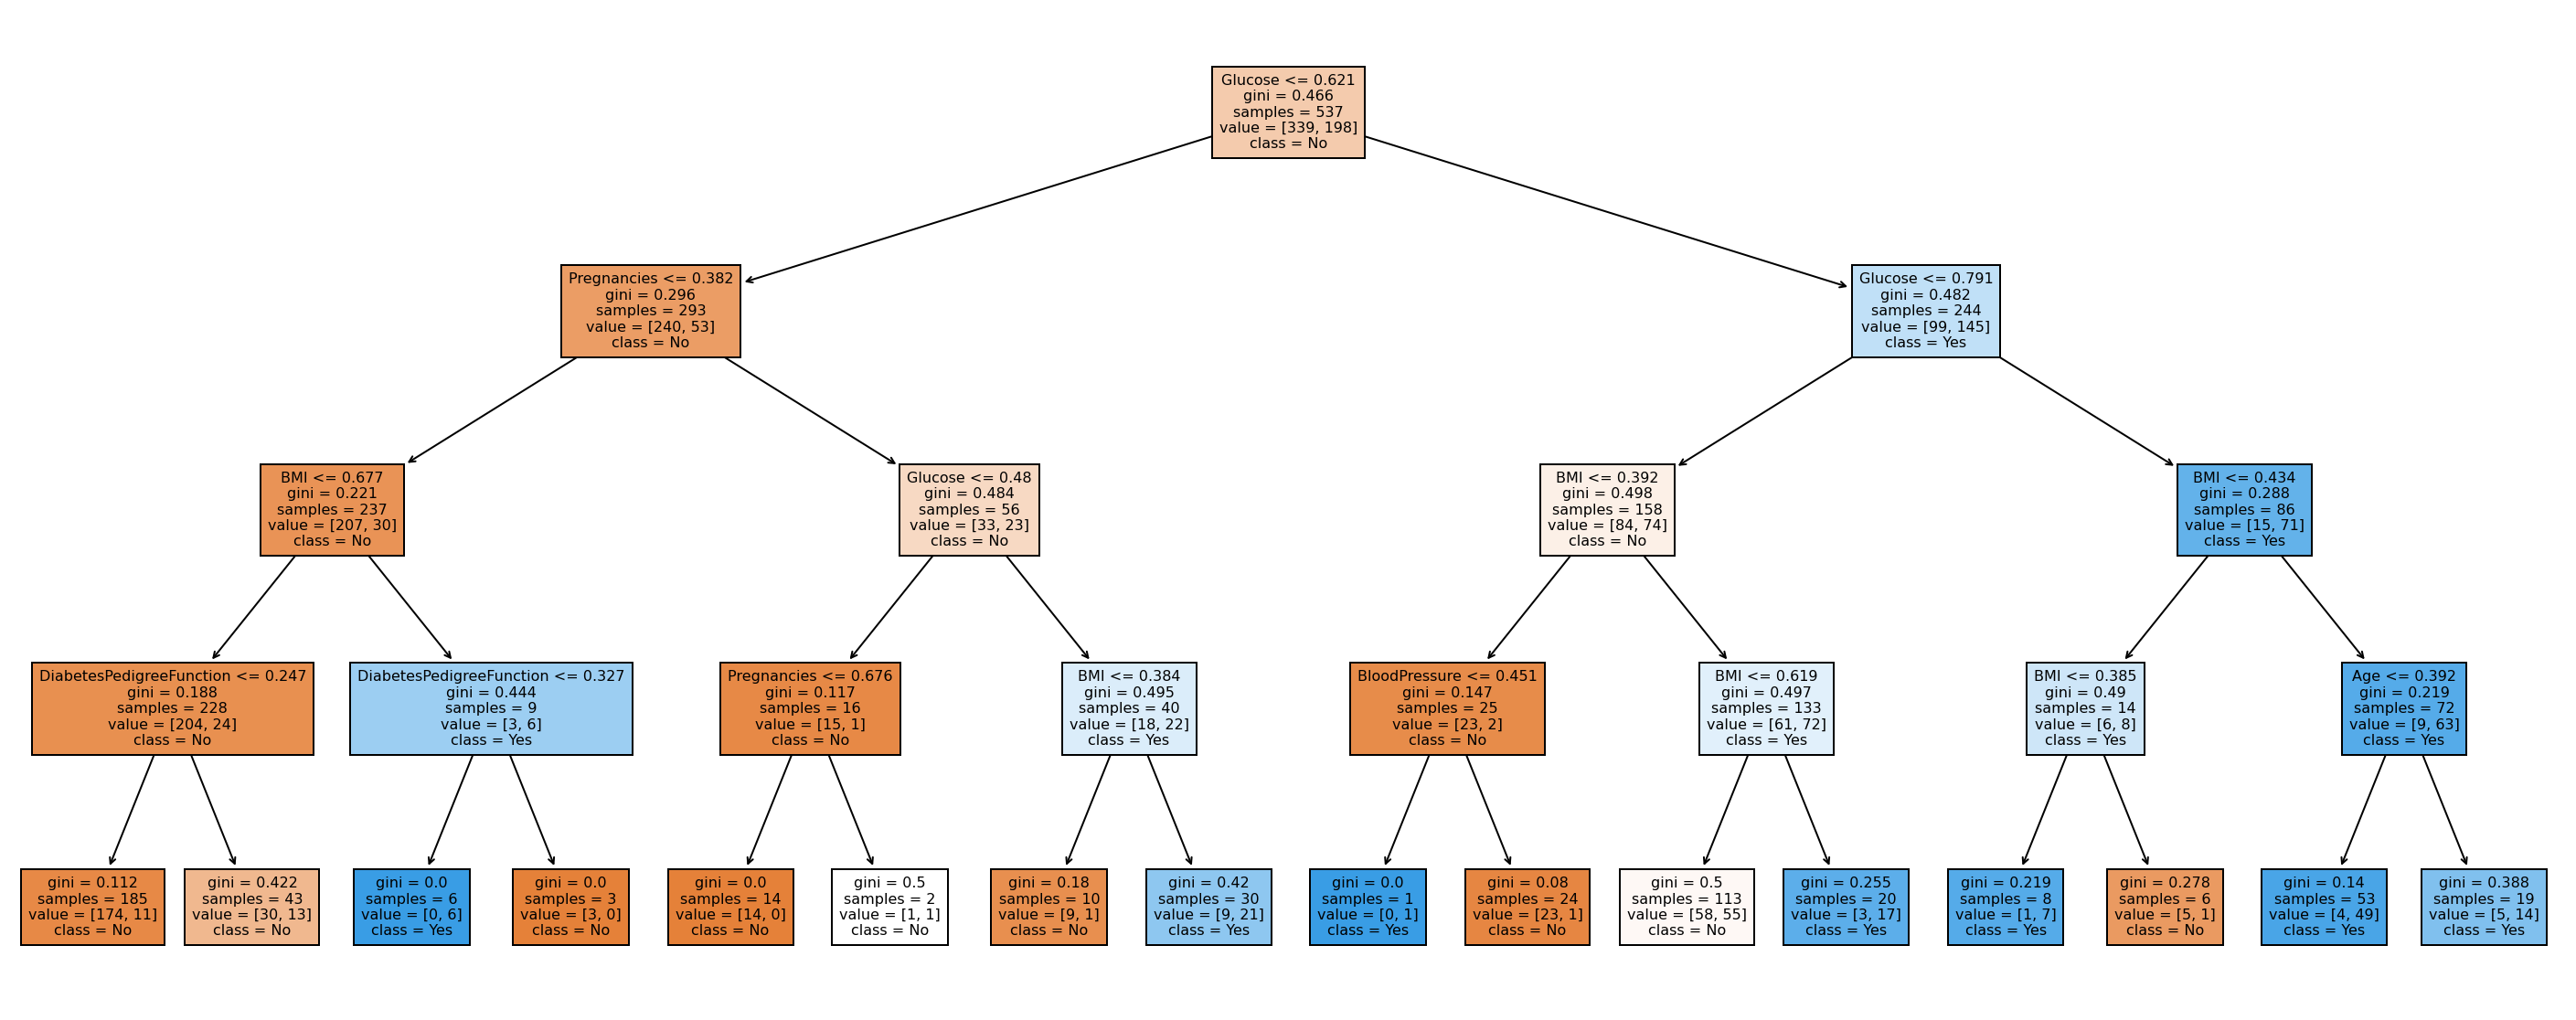

In [70]:
# 트리 시각화
from sklearn.tree import plot_tree

plt.figure(figsize=(25,10))
plot_tree(model.best_estimator_,
         filled = True,
         feature_names=list(x),
         class_names=['No', 'Yes'],
         fontsize=8)
plt.show()

## 4.3.Logistic Regression

- GridSearchCV를 사용하지 않고 모델링합니다.

In [71]:
# 선언하기
model = LogisticRegression()

In [72]:
# 학습하기
model.fit(x_train, y_train)

LogisticRegression()

In [73]:
# 예측하기
y_pred = model.predict(x_test)

In [74]:
# 평가하기
print(classification_report(y_test, y_pred))
result['LogisticRegression'] = classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.79      0.93      0.85       161
           1       0.72      0.44      0.55        70

    accuracy                           0.78       231
   macro avg       0.76      0.68      0.70       231
weighted avg       0.77      0.78      0.76       231



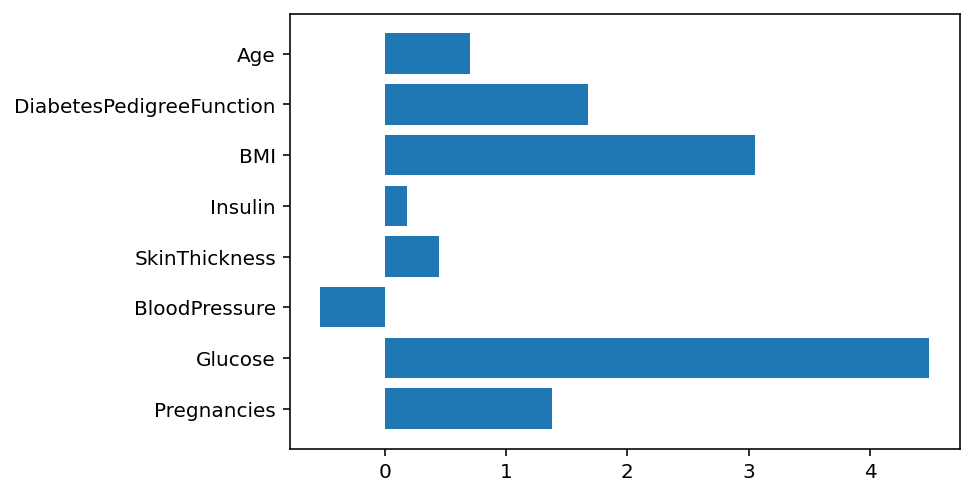

In [75]:
# 변수 가중치 시각화
plt.barh(y = list(x), width = model.coef_.reshape(-1))
plt.show()

## 4.4.SVM

- 파라미터
    - C: [0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000]
    - gamma: [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]
- GridSearchCV 선언
    - cv = 5
    - scoring = 'accuracy'

In [40]:
# 선언하기
model_svm = SVC()

# 파라미터 선언
pram = {'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000],
       'gamma': [0.00001, 0.0001, 0.001, 0.01, 1, 10, 100]}


# Grid Search 모델 선언하기

model = GridSearchCV(model_svm,
                    pram,
                    cv = 5,
                    scoring='accuracy')



In [41]:
# 학습하기
model.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.0001, 0.001, 0.01, 1, 10, 100, 1000, 10000],
                         'gamma': [1e-05, 0.0001, 0.001, 0.01, 1, 10, 100]},
             scoring='accuracy')

In [42]:
# 최적파라미터, 성능 확인
print(model.best_params_)
print(model.best_score_)


{'C': 1000, 'gamma': 0.001}
0.77466251298027


In [43]:
# 예측하기

y_pred = model.predict(x_test)

In [48]:
# 평가하기
print(classification_report(y_test, y_pred))
result['SVM'] = classification_report(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.80      0.91      0.85       161
           1       0.69      0.49      0.57        70

    accuracy                           0.78       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.77      0.78      0.77       231



# 5. 성능비교

In [52]:
for m_name, m_score in result.items():
    print('=' *56)
    print(m_name)
    print('-' * 56)
    print(m_score)
# print(result)

KNN
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       161
           1       0.69      0.49      0.57        70

    accuracy                           0.78       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.77      0.78      0.77       231

Decision Tree
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       161
           1       0.69      0.49      0.57        70

    accuracy                           0.78       231
   macro avg       0.75      0.70      0.71       231
weighted avg       0.77      0.78      0.77       231

LogisticRegression
--------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.91      0.85       161
           1       0.69      